# Delta Scuti pulsators across the sky

M Kenworthy / 20 May 2018

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy.coordinates import SkyCoord
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import Angle


Read in the catalog

In [84]:
t = Table.read("cat/table1.dat", readme="cat/ReadMe", format="ascii.cds")

Plot the number count versus visual magnitude

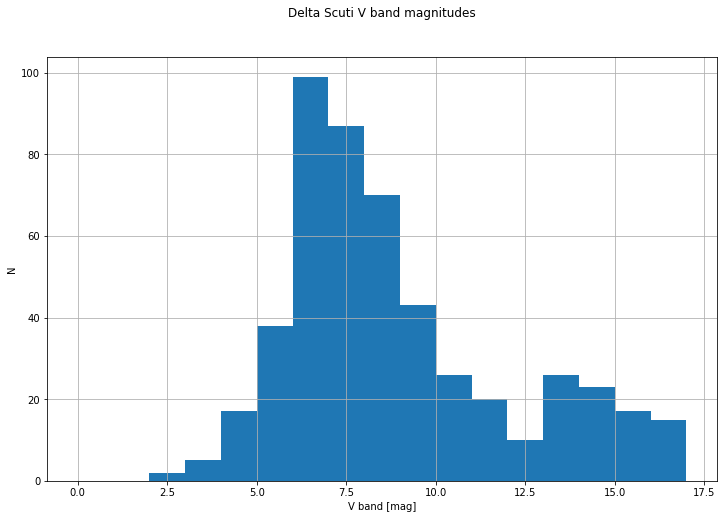

In [93]:
plt.figure(figsize=(12,6.2))
plt.title("Delta Scuti V band magnitudes", y=1.08)
plt.grid(True)
plt.hist(t['Vmag'],np.arange(18));
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.xlabel('V band [mag]')
plt.ylabel('N')
plt.show()

In [94]:
ra = Angle((t['RAh'] + t['RAm'] /60. + t['RAs'] /3600.), unit = u.hourangle)

# converting string sign to +/- 1.0 ... must be a better way...
des = ((t['DE-'] == '-') * -2. + 1.)
dec = Angle(des * (t['DEd'] + t['DEm'] /60.), unit = u.degree)


c = SkyCoord(ra=ra, dec=dec, frame='icrs')

ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

Plot the distribution of Delta Scutis across the sky

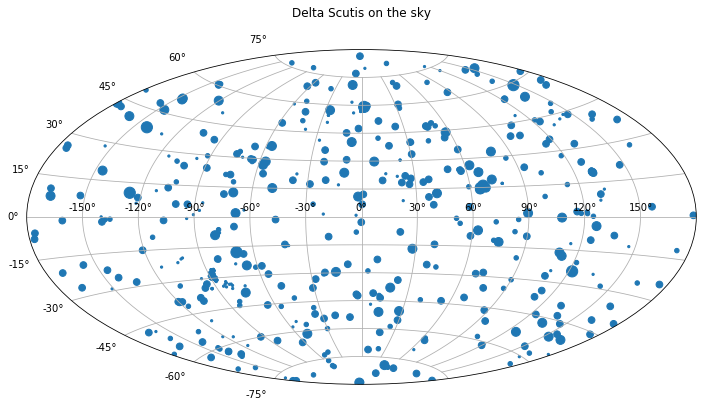

In [134]:

def mag_markers(m):
    'convert magnitudes to sensible symbol sizes'
    s = np.floor(7 - (m/2))
    s[(s<0)] = 1.
    return s

ms = mag_markers(t['Vmag'])

plt.figure(figsize=(12,6.2))
plt.subplot(111, projection="aitoff")
plt.title("Delta Scutis on the sky", y=1.08)
plt.grid(True)
#plt.plot(ra_rad, dec_rad, 'o', alpha=0.3)
plt.scatter(ra_rad, dec_rad, s=5*ms*ms)

plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()